# Employee Burnout Challenge
### Submitted by: Akshay Hari - M.Tech in AI and Data Science

- **Employee ID**          - Unique Id of the employee
- **Date of Joining**      - Date on which the employee joined the company
- **Gender**               - Gender of the employee
- **Company Type**	     - Type of company eg: Service based, product based etc.
- **WFH Setup Available**	 - Whether proper work from home setup is available or not
- **Designation**	         - Seniority level of the employee in codes
- **Resource Allocation**	 - Hours allocated per day
- **Mental Fatigue Score** - Stress rating provided by employees
- **Burn Rate**            - Rate of saturation or burn out rate

Dataset: https://www.kaggle.com/redwankarimsony/hackerearth-employee-burnout-challenge
## Pandas-bokeh is required

In [1]:
pip install pandas-bokeh

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve,accuracy_score,plot_confusion_matrix,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [3]:
test = pd.read_csv("https://github.com/akshayhari/Employee_Burnout/raw/main/employee_test.csv")
train = pd.read_csv("https://github.com/akshayhari/Employee_Burnout/raw/main/employee_train.csv")

In [4]:
test.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4


In [5]:
train.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


## Checking for null values

In [6]:
train.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


### Percentage of usable data i.e. rows without null values

In [8]:
missing = train.isnull().any(axis=1).sum()
((train.shape[0] - missing)/train.shape[0])*100

81.71428571428572

In [9]:
train.dropna(inplace=True)
train = train.reset_index(drop=True)
missing = train.isnull().any(axis=1).sum()
((train.shape[0] - missing)/train.shape[0])*100

100.0

### Removing space from column name for easier handling

In [10]:
train.columns = [s.strip().replace(" " , "_") for s in train.columns]
test.columns = [s.strip().replace(" " , "_") for s in test.columns]
train.columns

Index(['Employee_ID', 'Date_of_Joining', 'Gender', 'Company_Type',
       'WFH_Setup_Available', 'Designation', 'Resource_Allocation',
       'Mental_Fatigue_Score', 'Burn_Rate'],
      dtype='object')

In [11]:
df = train.copy()

### Converting date column into ordinal values

In [12]:
test.Date_of_Joining = test.Date_of_Joining.apply(lambda x: x.strip().replace("-" , "")).astype(int)
train.Date_of_Joining = train.Date_of_Joining.apply(lambda x: x.strip().replace("-" , "")).astype(int)
train.Date_of_Joining.head()

0    20080930
1    20081130
2    20081103
3    20080724
4    20081126
Name: Date_of_Joining, dtype: int32

### Analyzing and encoding features

In [13]:
print(test.Gender.unique())
print(train.Gender.unique())

['Female' 'Male']
['Female' 'Male']


In [14]:
print(test.Company_Type.unique())
print(train.Company_Type.unique())

['Service' 'Product']
['Service' 'Product']


In [15]:
print(test.WFH_Setup_Available.unique())
print(train.WFH_Setup_Available.unique())

['No' 'Yes']
['No' 'Yes']


In [16]:
test.Gender.replace({'Male':0, 'Female':1}, inplace=True)
train.Gender.replace({'Male':0, 'Female':1}, inplace=True)
test.Company_Type.replace({'Service':0, 'Product':1}, inplace=True)
train.Company_Type.replace({'Service':0, 'Product':1}, inplace=True)
test.WFH_Setup_Available.replace({'No':0, 'Yes':1}, inplace=True)
train.WFH_Setup_Available.replace({'No':0, 'Yes':1}, inplace=True)

In [17]:
train.head()

,Employee_ID,Date_of_Joining,Gender,Company_Type,WFH_Setup_Available,Designation,Resource_Allocation,Mental_Fatigue_Score,Burn_Rate
0,fffe32003000360033003200,20080930,1,0,0,2.0,3.0,3.8,0.16
1,fffe3700360033003500,20081130,0,0,1,1.0,2.0,5.0,0.36
2,fffe32003400380032003900,20081103,0,0,1,1.0,1.0,2.6,0.20
3,fffe31003900340031003600,20080724,1,0,0,3.0,7.0,6.9,0.52
4,fffe3300350037003500,20081126,0,1,1,2.0,4.0,3.6,0.29


# Correlation between features

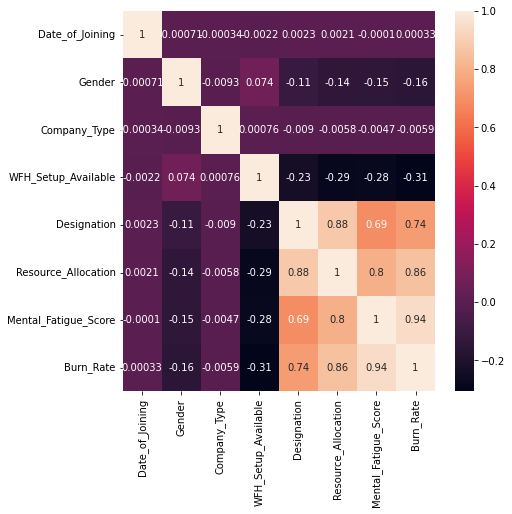

In [18]:
corrmat=train.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(7,7))
g=sns.heatmap(train[top_corr_features].corr(),annot=True)

# Visualization using Bokeh
- Tableau and Plotly done in Lab 3

In [19]:
from bokeh.io import show, output_notebook 
import pandas_bokeh
output_notebook()

Loading BokehJS ...

### Total number of working Males and Females

In [20]:
names = pd.DataFrame(df.Gender.value_counts())
names.plot_bokeh.bar(
    ylabel="Number of Persons", 
    title="Number of male and female workers",
    legend = "bottom_right")

Figure(id='1039', ...)

## Distribution of Working hours

In [21]:
df[['Resource_Allocation']].plot_bokeh.hist(
    vertical_xlabel=True,
    hovertool=True,
    title="Distribution of Working hours",
    color = "violet",
    line_color="black")

Figure(id='1147', ...)

## Scatter plot - Mental Fatigue vs Number of Working hours(Resource Allocation)
- Each dots represents designation of employees (0 to 5)
### Observations
- People with low designation level (Dark colors) have lower working hours and have comparitively lower mental fatigue score
- People with high designation level (Light colors) have higher working hours and have high mental fatigue scores.

In [22]:
df.plot_bokeh.scatter(
    x="Mental_Fatigue_Score",
    y="Resource_Allocation",
    category="Designation",
    title="Mental Fatigue vs Number of Working hours(Resource Allocation based on Designation")

Figure(id='1268', ...)

## Distribution of Designations

In [23]:
df[['Designation']].plot_bokeh.hist(
    ylabel = "Number of Persons",
    bins=5,
    vertical_xlabel=True,
    hovertool=True,
    title="Count Distribution of Designations",
    line_color="black")

Figure(id='1411', ...)

## Mental Fatigue Distribution w.r.t WFH
- People with no WFH have high Mental Fatigue scores (Left Skewed)

In [24]:
temp = pd.DataFrame()
temp['NoWFH'] = df[df['WFH_Setup_Available']=='No'].Mental_Fatigue_Score.reset_index().iloc[:,1]
temp['YesWFH'] = df[df['WFH_Setup_Available']=='Yes'].Mental_Fatigue_Score.reset_index().iloc[:,1]
temp.plot_bokeh.hist(
                    bins=10,
                    vertical_xlabel=True,
                    hovertool=True,
                    title="Distribution of Working hours",
                    line_color="black")

Figure(id='1552', ...)

In [25]:
#df.info()

## Student T-Test (Unpaired)

Since the data almost have a normal distribution, lets try to do a t-test to confirm our hypothesis. We do this by drawing a sample of size 30.

- **Null Hypothesis:** There is no difference between Mental Fatigue of people with and without WFH option
- **Alternate Hypothesis:** There is difference between Mental Fatigue of people with and without WFH option

In [26]:
ttest = pd.DataFrame()
ttest['No_WFH'] = train[train['WFH_Setup_Available']==0].Mental_Fatigue_Score.reset_index().iloc[:30,1]
ttest['WFH'] = train[train['WFH_Setup_Available']==1].Mental_Fatigue_Score.reset_index().iloc[:30,1]
ttest.tail(5)

,No_WFH,WFH
25,5.8,3.1
26,6.6,8.7
27,8.2,4.9
28,4.1,6.5
29,7.4,6.2


In [27]:
nWFH = ttest[['No_WFH']]
yWFH = ttest[['WFH']]
print("No_WFH mean:",nWFH.mean().values[0])
print("WFH mean:",yWFH.mean().values[0])

No_WFH mean: 6.726666666666666
WFH mean: 5.223333333333333


In [28]:
import scipy.stats as stats
x,p_value=stats.ttest_ind(nWFH,yWFH)
print("P-value:",p_value[0])
if p_value[0] < 0.05:
    print("\nWe are rejecting null hypothesis")
else:
    print("\nWe are accepting null hypothesis")

P-value: 0.0007266448913034989

We are rejecting null hypothesis


# Regression
### Predicting Burn_rate from other variables

In [29]:
X = train.drop(columns = ['Burn_Rate','Employee_ID','Date_of_Joining','Gender'])
y = train[['Burn_Rate']]
X1 = train[['Mental_Fatigue_Score']]

## Univariate Linear Regression

x Train: (13013, 1)
x Test: (5577, 1)
y Train: (13013, 1)
y Test: (5577, 1)

R2 score 89.43480366644346
RMS error of Testing Data: 0.06495877190534229


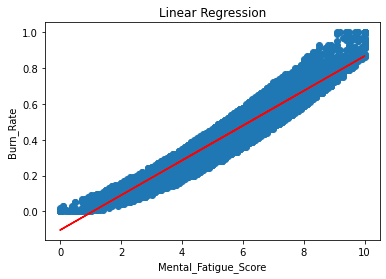

In [30]:
def linear_regression(X,y):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)
    print("x Train:",x_train.shape)
    print("x Test:",x_test.shape)
    print("y Train:",y_train.shape)
    print("y Test:",y_test.shape)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    print("\nR2 score",r2_score(y_test,pred)*100)
    rmse = (np.sqrt(mean_squared_error(y_test, pred)))
    print("RMS error of Testing Data:",rmse)
    if x_train.shape[1] == 1 and x_test.shape[1]:
        plt.scatter(x=x_test,y=y_test)
        plt.plot(X,lr.predict(X), color='red')
        plt.title('Linear Regression')
        plt.xlabel(X.columns[0])
        plt.ylabel(y.columns[0])
linear_regression(X1,y)

## Multivariate Linear Regression

In [31]:
linear_regression(X,y)

x Train: (13013, 5)
x Test: (5577, 5)
y Train: (13013, 1)
y Test: (5577, 1)

R2 score 92.16803189123071
RMS error of Testing Data: 0.055356718114152145


## Bagging Regression with Linear Regression as base estimator

In [32]:
from sklearn.ensemble import BaggingRegressor
def bagging_regressor(X,y):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)
    print("x Train:",x_train.shape)
    print("x Test:",x_test.shape)
    print("y Train:",y_train.shape)
    print("y Test:",y_test.shape)
    reg_lr = LinearRegression()
    regr = BaggingRegressor(base_estimator=reg_lr).fit(x_train, y_train.values.ravel())
    pred = regr.predict(x_test)
    print("\nR2 score",r2_score(y_test,pred))
    # model evaluation for testing set
    rmse = (np.sqrt(mean_squared_error(y_test, pred)))
    print("RMS error of Testing Data:",rmse)

In [33]:
bagging_regressor(X,y)

x Train: (13013, 5)
x Test: (5577, 5)
y Train: (13013, 1)
y Test: (5577, 1)

R2 score 0.9218584426883022
RMS error of Testing Data: 0.055386716191877336


## Boosting Regressor

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
def boosting_regressor(X,y):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)
    print("x Train:",x_train.shape)
    print("x Test:",x_test.shape)
    print("y Train:",y_train.shape)
    print("y Test:",y_test.shape)
    regr = GradientBoostingRegressor(random_state=0).fit(x_train, y_train.values.ravel())
    pred = regr.predict(x_test)
    print("\nR2 score",r2_score(y_test,pred))
    # model evaluation for testing set
    rmse = (np.sqrt(mean_squared_error(y_test, pred)))
    print("RMS error of Testing Data:",rmse)
boosting_regressor(X,y)

x Train: (13013, 5)
x Test: (5577, 5)
y Train: (13013, 1)
y Test: (5577, 1)

R2 score 0.9273262048843659
RMS error of Testing Data: 0.053641640801058814


# Classification
Since WFH is highly correlated with Mental Fatigue Score, let's try to predict whether employee has WFH option based on these features.
- Predicting whether employee has work from home option available
- In the above visualizations, we saw that employees have low mental fatigue when WFH option is available. Using this, we can do classification.

In [35]:
X = train.drop(columns = ['Employee_ID','WFH_Setup_Available','Date_of_Joining'])
y = train[['WFH_Setup_Available']]

--------------------------------------------------------------------
Random Forest Classifier

10-fold cv [62.67281106 62.74961598 61.44393241 64.02767102 59.56956188 61.33743274
 63.18216756 62.41352806 60.26133743 63.48962337]
10-fold accuracy mean: 62.114768150695845 %
--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.59      0.58      0.58      2566
           1       0.65      0.65      0.65      3011

    accuracy                           0.62      5577
   macro avg       0.62      0.62      0.62      5577
weighted avg       0.62      0.62      0.62      5577



c:\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


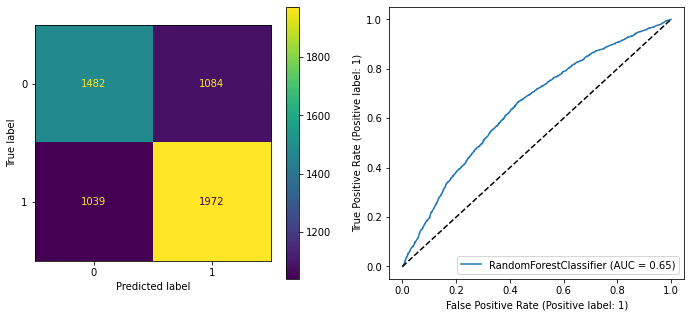

True

In [36]:
def randomForest(X,y):
    train_X,test_X,train_y,test_y = train_test_split(X,y,test_size = 0.3)
    rnd = RandomForestClassifier()
    rnd.fit(train_X, train_y.values.ravel())
    y_pred_rnd = rnd.predict(test_X)
    print("--------------------------------------------------------------------")
    print("Random Forest Classifier")
    print("")
    kfold = model_selection.KFold(n_splits=10)
    results_kfold = model_selection.cross_val_score(rnd, train_X, train_y.values.ravel(), cv=kfold)
    print("10-fold cv",results_kfold*100)
    print("10-fold accuracy mean:",results_kfold.mean()*100,"%") 
    print("--------------------------------------------------------------------")
    print(classification_report(test_y,y_pred_rnd))
    fig = plt.figure(figsize=(18,5))
    ax = fig.add_subplot(1,3,1)
    plot_confusion_matrix(rnd,test_X,test_y,ax=ax)
    ax = fig.add_subplot(1,3,2)
    metrics.plot_roc_curve(rnd,test_X,test_y,ax=ax)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.show()
    return True
randomForest(X,y)

# Bagging with Naive Bayes Classifier

---------------------------------------------------------------------
Bagging with GaussianNB Classifier

10-fold cv [66.89708141 65.3609831  66.12903226 67.0253651  66.33358955 66.7179093
 66.4104535  69.17755573 68.56264412 66.5641814 ]
10-fold accuracy mean: 66.91787954675064 %
--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.64      0.62      0.63      2552
           1       0.69      0.71      0.70      3025

    accuracy                           0.67      5577
   macro avg       0.66      0.66      0.66      5577
weighted avg       0.67      0.67      0.67      5577



c:\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


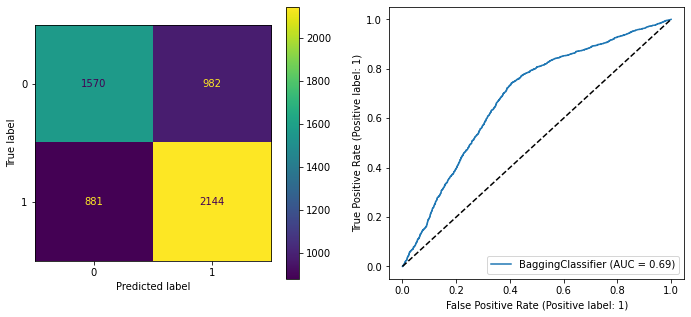

True

In [37]:
from sklearn.svm import SVC
def baggingSVC(X,y):
    train_X,test_X,train_y,test_y = train_test_split(X,y,test_size = 0.3)
    rnd = BaggingClassifier(base_estimator=GaussianNB())
    rnd.fit(train_X, train_y.values.ravel())
    y_pred_rnd = rnd.predict(test_X)
    print("---------------------------------------------------------------------")
    print("Bagging with GaussianNB Classifier")
    print("")
    kfold = model_selection.KFold(n_splits=10)
    results_kfold = model_selection.cross_val_score(rnd, train_X, train_y.values.ravel(), cv=kfold)
    print("10-fold cv",results_kfold*100)
    print("10-fold accuracy mean:",results_kfold.mean()*100,"%") 
    print("--------------------------------------------------------------------")
    print(classification_report(test_y,y_pred_rnd))
    fig = plt.figure(figsize=(18,5))
    ax = fig.add_subplot(1,3,1)
    plot_confusion_matrix(rnd,test_X,test_y,ax=ax)
    ax = fig.add_subplot(1,3,2)
    metrics.plot_roc_curve(rnd,test_X,test_y,ax=ax)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.show()
    return True
baggingSVC(X,y)

## Graiant Boosting Classifier

--------------------------------------------------------------------
Gradient Boosting Classifier

10-fold cv [71.42857143 68.20276498 69.66205837 69.40814758 68.02459646 68.79323597
 68.17832437 66.79477325 68.94696387 67.94773251]
10-fold accuracy mean: 68.73871687972503 %
--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.59      0.64      2571
           1       0.69      0.78      0.73      3006

    accuracy                           0.69      5577
   macro avg       0.69      0.68      0.69      5577
weighted avg       0.69      0.69      0.69      5577



c:\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


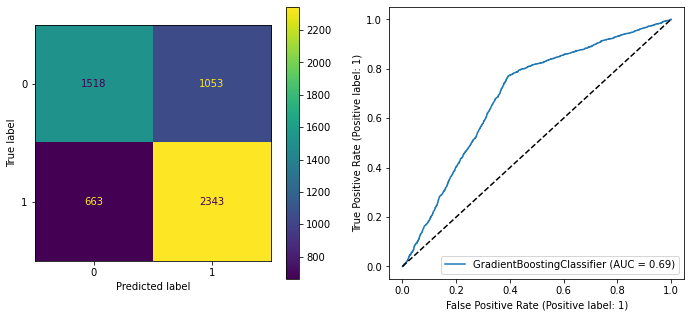

True

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
def boosting(X,y):
    train_X,test_X,train_y,test_y = train_test_split(X,y,test_size = 0.3)
    rnd = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, 
                                     max_depth=2, random_state=0).fit(train_X, train_y.values.ravel())
    y_pred_rnd = rnd.predict(test_X)
    print("--------------------------------------------------------------------")
    print("Gradient Boosting Classifier")
    print("")
    kfold = model_selection.KFold(n_splits=10)
    results_kfold = model_selection.cross_val_score(rnd, train_X, train_y.values.ravel(), cv=kfold)
    print("10-fold cv",results_kfold*100)
    print("10-fold accuracy mean:",results_kfold.mean()*100,"%") 
    print("--------------------------------------------------------------------")
    print(classification_report(test_y,y_pred_rnd))
    fig = plt.figure(figsize=(18,5))
    ax = fig.add_subplot(1,3,1)
    plot_confusion_matrix(rnd,test_X,test_y,ax=ax)
    ax = fig.add_subplot(1,3,2)
    metrics.plot_roc_curve(rnd,test_X,test_y,ax=ax)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.show()
    return True
boosting(X,y)

### Therefore using classifcation, we're able to classify whether person have option of work from home with an accuracy of 70%

## Observations
- There is high correlation between WFH and mental fatigue score
- Burnout is dependent on mental fatigue score.
- Employees with higher job designation have high mental fatigue score
- In the dataset, the mental fatigue score is a rating given by the employee, so whether a person is having a burnout or not can be obtained from person only.
- Although WFH option is an important factor, not sure how it is relevant in current scenario (Pandemic)

## Suggestions
- Regularly check for stress/happiness level
- A non-intrusive optional app for checking stress/happiness level of employee
- Give importance to stress levels in Friday evenings and Monday mornings
- This helps us to identify how much an employee is looking forward for weekend and coming to work on Monday
- Availability of WFH option